# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

## **Manipulación y preparación de datos**

In [7]:
data = pd.read_csv(r'C:\Users\jasso\Documents\GitHub\MLOps_Equipo-7\notebooks\Fase-1\data\raw\SouthGermanCredit.asc', sep=' ')
data.head(5)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [8]:
data.columns=["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors",
            "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker",
            "credit_risk"]
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [9]:
X=data.drop(columns=["credit_risk"])
y=data[["credit_risk"]]
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y[["credit_risk"]], test_size=0.3, random_state=42, stratify=y["credit_risk"])
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42, stratify=ytemp)

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700, 1)
(150, 20) (150, 1)
(150, 20) (150, 1)


In [10]:
var_num=["duration", "amount", "age"]
var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex", "other_debtors", "other_installment_plans","housing"]
var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits","job"]
var_bin=["telephone", "foreign_worker", "credit_risk", "person_liable"]

In [13]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = Pipeline(steps=[("scale", StandardScaler()),("transf", FunctionTransformer())])
num_pipe_nombres = var_num

# Variables categóricas:
cat_ord_pipe = Pipeline(steps=[("ordin", OrdinalEncoder())])
cat_ord_nombres = var_ord


cat_nom_pipe = Pipeline(steps=[("dummies", OneHotEncoder())])
cat_nom_nombres = var_nom

# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer([("scale_transform", num_pipe, num_pipe_nombres), ("ordin", cat_ord_pipe , cat_ord_nombres),
("ohe", cat_nom_pipe , cat_ord_nombres),], remainder="passthrough")

# *********** Aquí termina la sección de agregar código *************

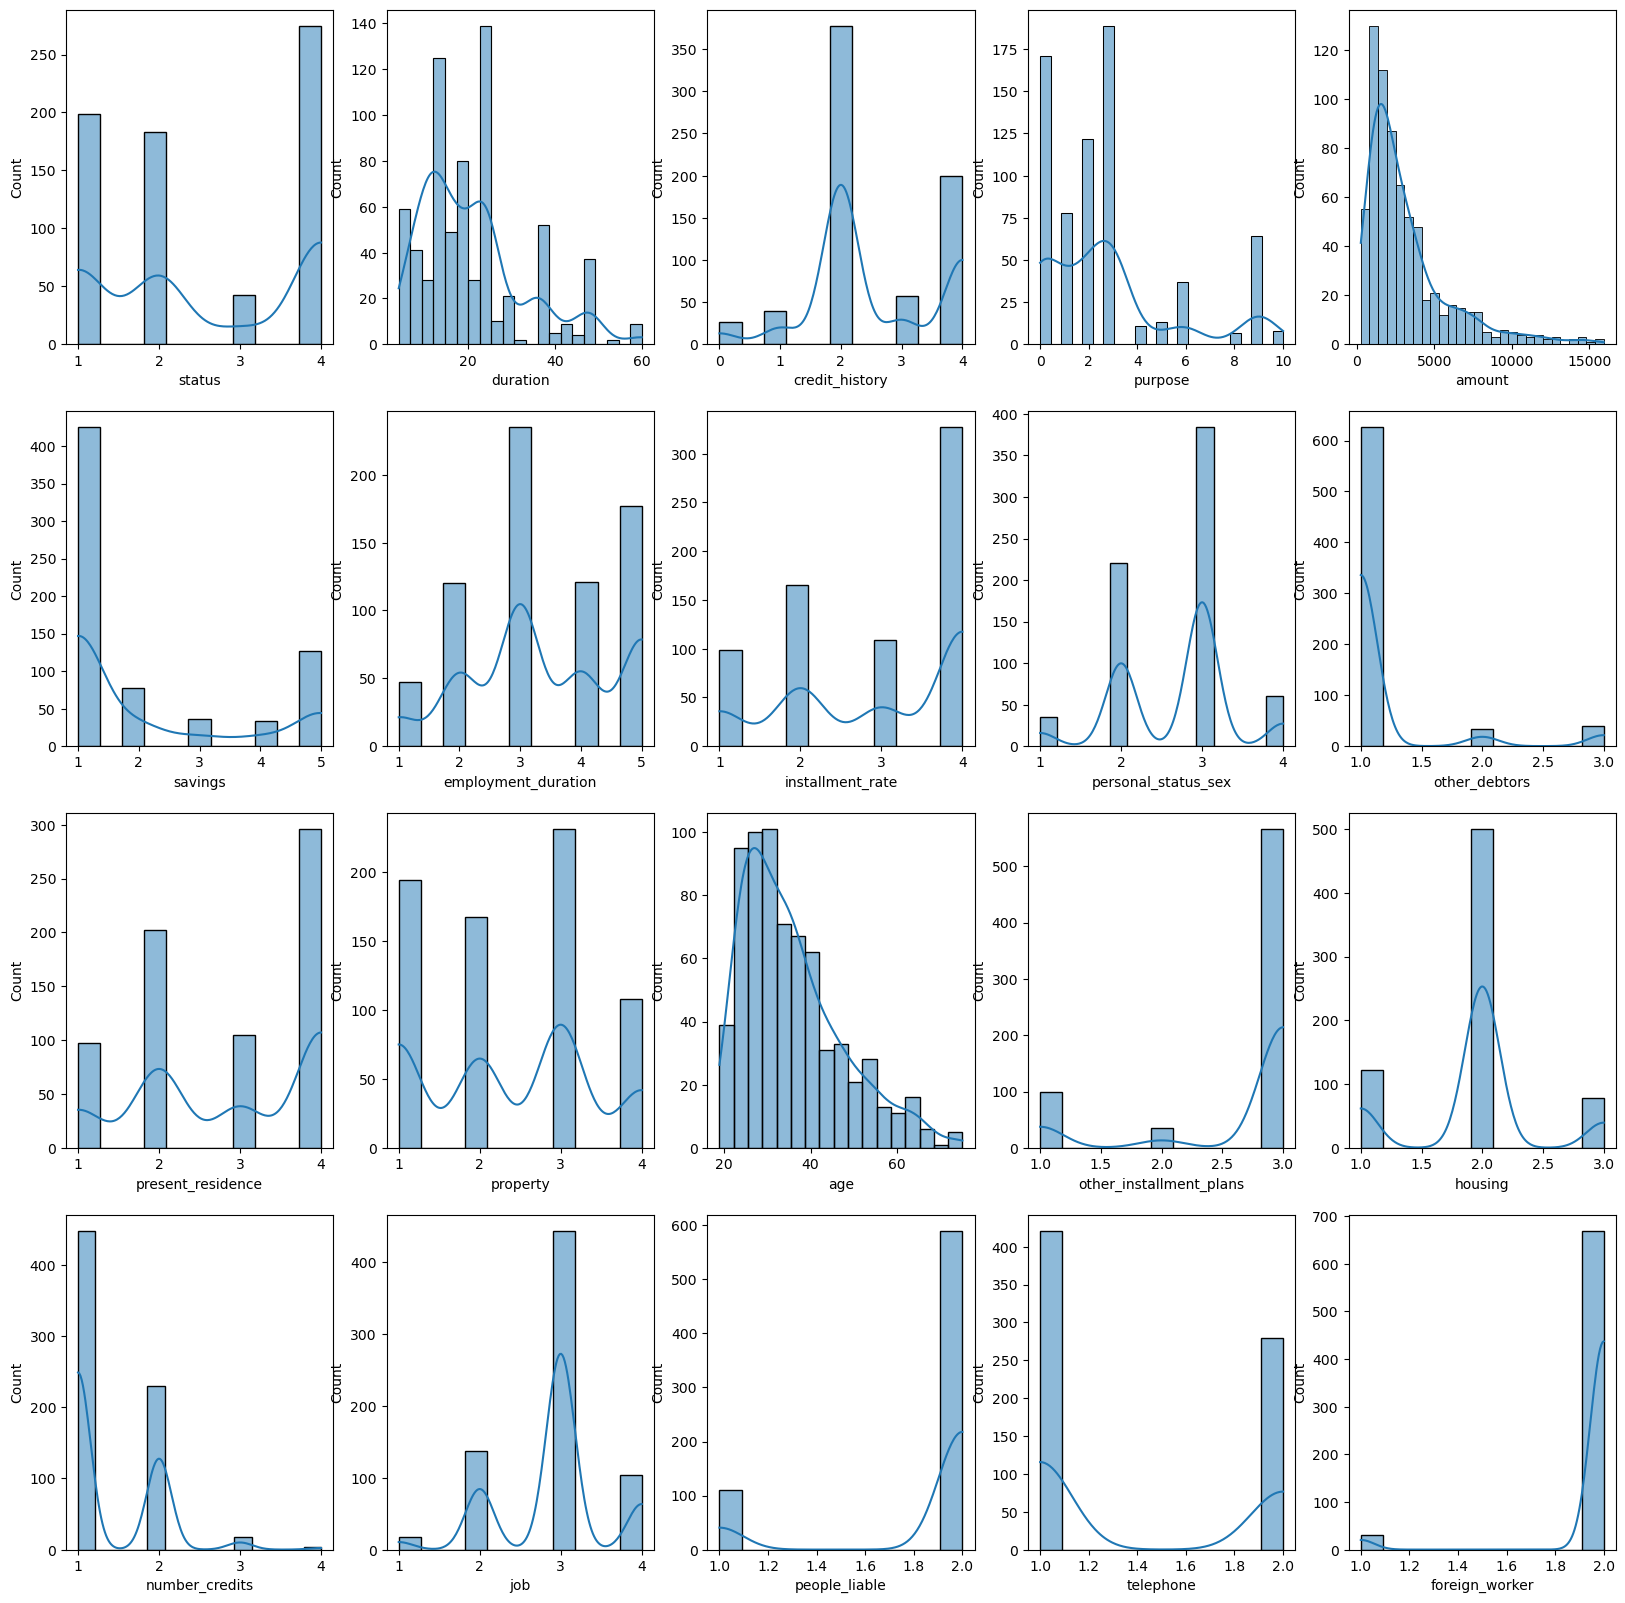

In [14]:
fig, axs=plt.subplots(4,5, figsize=(20,20))
for col, ax in zip(Xtrain.describe().columns, axs.ravel()):
  sns.histplot(x=Xtrain[col], ax=ax, kde=True)

In [15]:
data_numeric = data.select_dtypes(include=[np.number])

# Estandarizar los datos (media=0, desviación estándar=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [16]:
pca = PCA(n_components=2)

# Ajustar PCA a los datos escalados
data_pca = pca.fit_transform(data_scaled)
# Porcentaje de varianza explicada por cada componente principal
print(pca.explained_variance_ratio_)

# Varianza acumulada
print(np.cumsum(pca.explained_variance_ratio_))

[0.12157517 0.10247798]
[0.12157517 0.22405315]


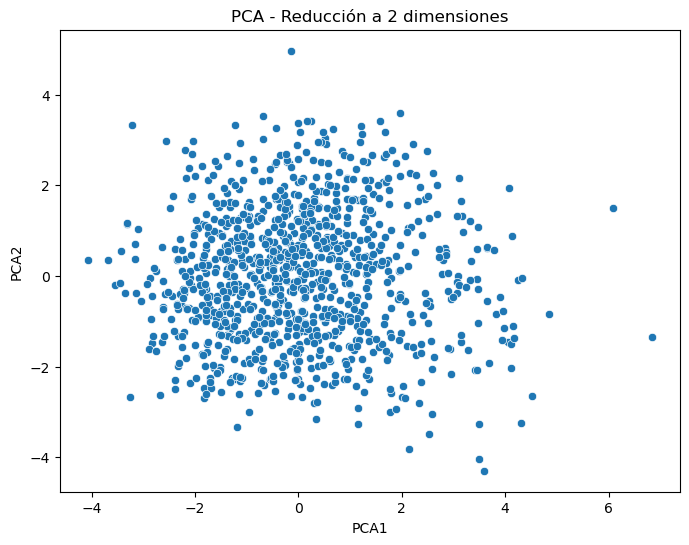

In [17]:
data_pca_2D = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Gráfico de dispersión de los dos componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca_2D)
plt.title('PCA - Reducción a 2 dimensiones')
plt.show()

## **Exploración y preprocesamiento de datos**

## **Versionado de datos**

## **Construcción, ajuste y evaluación de Modelos de Machine Learning**

## **Aplicación de Mejores Prácticas en el Pipeline de Modelado**

## **Estructuración y Refactorización del Código**